In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [2]:
# loading the data
total_movies = pd.read_csv("movies_exp_00_19.csv")
movies = pd.read_csv("movies_cast_2.csv")
principals = pd.read_csv("principals.csv")
filtered_movies = pd.read_csv("filtered_movies.csv")
ethnicity = pd.read_csv("cleaned_race_name.csv")

In [3]:
total_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_sep
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Action
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",Crime
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Comedy
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Fantasy
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",Romance


In [4]:
movies_exp = movies.assign(genres_sep = movies['genres'].str.split(',')).explode("genres_sep")
movies_exp.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Horror
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Mystery
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Thriller


In [5]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [6]:
total_movies.genres_sep.value_counts()

Drama          82766
Documentary    74965
Comedy         41678
Action         17348
Thriller       17275
Romance        17110
Horror         15502
Crime          11645
Biography       9915
Adventure       9056
Family          8141
History         7476
Mystery         7173
Music           6741
Fantasy         5665
Sci-Fi          4667
Animation       4278
Sport           3864
Musical         2397
War             2366
News            1300
Adult           1277
Western          681
Reality-TV       284
Talk-Show         82
Short             34
Game-Show         10
Name: genres_sep, dtype: int64

In [7]:
# movies.averageRating.value_counts()

In [8]:
# movies_exp.groupby("genres_sep")["tconst"].count()

In [9]:
# movies_exp.genres_sep.value_counts()

In [10]:
# principals.shape

In [11]:
# principals.tconst.nunique()

### add ethinicity based on nconst, year based on tconst 

#### x year, y count 



In [12]:
filtered_movies.shape

(3587, 19)

In [13]:
# pd.concat([df1, filtered_movies], axis=1, join="inner")

In [14]:
merged_year = pd.merge(principals, filtered_movies, on='tconst')
merged_year.shape

(14122, 24)

In [15]:
merged_year_ethnicity = pd.merge(merged_year, ethnicity, on='nconst')

In [16]:
merged_year_ethnicity.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters',
       'index', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'tmdb_id',
       'og_language', 'budget', 'revenue', 'ratio', 'ROI', 'averageRating',
       'numVotes', 'Unnamed: 18', 'Unnamed: 0', 'first_name', 'last_name',
       'NEW_ACTOR_RACE', 'race'],
      dtype='object')

In [17]:
merged_year_ethnicity_clean = merged_year_ethnicity[["startYear", "NEW_ACTOR_RACE", "tconst"]]

In [18]:
merged_year_ethnicity_clean.head()

,startYear,NEW_ACTOR_RACE,tconst
0,2001,w,tt0035423
1,2000,w,tt0162983
2,2003,w,tt0199626
3,2004,w,tt0312329
4,2007,w,tt0419843


In [19]:
merged_year_ethnicity_clean["NEW_ACTOR_RACE"].nunique()

9

In [20]:
merged_year_ethnicity_clean.groupby(["startYear","NEW_ACTOR_RACE"]).size()

startYear  NEW_ACTOR_RACE
2000       HL+M                5
           HL+O                9
           NL+M               11
           NL+O               27
           a                  18
                            ... 
2019       a                  43
           b                  63
           i                  15
           l                   4
           w                 266
Length: 180, dtype: int64

In [21]:
grouped_df = merged_year_ethnicity_clean.groupby(["startYear","NEW_ACTOR_RACE"]).count()
grouped_df

tconst
startYear NEW_ACTOR_RACE        
2000      HL+M                 5
          HL+O                 9
          NL+M                11
          NL+O                27
          a                   18
...                          ...
2019      a                   43
          b                   63
          i                   15
          l                    4
          w                  266

[180 rows x 1 columns]

In [22]:
grouped_df.tconst

startYear  NEW_ACTOR_RACE
2000       HL+M                5
           HL+O                9
           NL+M               11
           NL+O               27
           a                  18
                            ... 
2019       a                  43
           b                  63
           i                  15
           l                   4
           w                 266
Name: tconst, Length: 180, dtype: int64

In [23]:
df = grouped_df["tconst"]
df.unstack()

NEW_ACTOR_RACE,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w
startYear,,,,,,,,,
2000,5,9,11,27,18,75,14,9,381
2001,5,13,13,39,20,81,16,7,420
2002,11,13,21,37,22,89,16,12,415
2003,9,10,14,30,22,77,14,10,442
2004,10,19,11,33,39,85,19,8,459
2005,8,16,26,63,37,86,21,9,503
2006,8,19,28,65,48,114,28,5,521
2007,10,21,19,51,59,83,24,19,497
2008,12,14,25,35,52,83,21,9,509


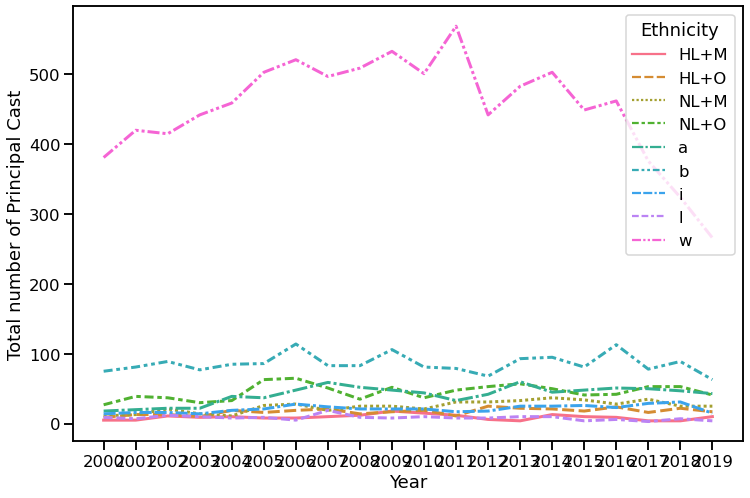

In [24]:
sns.set_palette("PuBuGn_d")
sns.set_context("talk")
 

# sns.set_palette('RdBu', n_colors=9)


# Create the Seaborn plot
ax = sns.lineplot(data=grouped_df, x="startYear", y="tconst", hue="NEW_ACTOR_RACE",legend='brief',style="NEW_ACTOR_RACE",linewidth=3 ) 


# Change the x-axis label
ax.set_xlabel('Year')

# Change the y-axis label
ax.set_ylabel('Total number of Principal Cast')

years = range(df.unstack().index.min(), df.unstack().index.max() + 1)
ax.set_xticks(years)


# Adjust the size of the figure
ax.figure.set_size_inches(12, 8)

plt.legend(loc='upper right', title='Ethnicity')


In [25]:
years = range(df.unstack().index.min(), df.unstack().index.max() + 1)
year_labels = ["'"+str(y)[2:] for y in years]

year_labels_dict = dict(zip(years,year_labels ))
year_labels_dict

{2000: "'00",
 2001: "'01",
 2002: "'02",
 2003: "'03",
 2004: "'04",
 2005: "'05",
 2006: "'06",
 2007: "'07",
 2008: "'08",
 2009: "'09",
 2010: "'10",
 2011: "'11",
 2012: "'12",
 2013: "'13",
 2014: "'14",
 2015: "'15",
 2016: "'16",
 2017: "'17",
 2018: "'18",
 2019: "'19"}

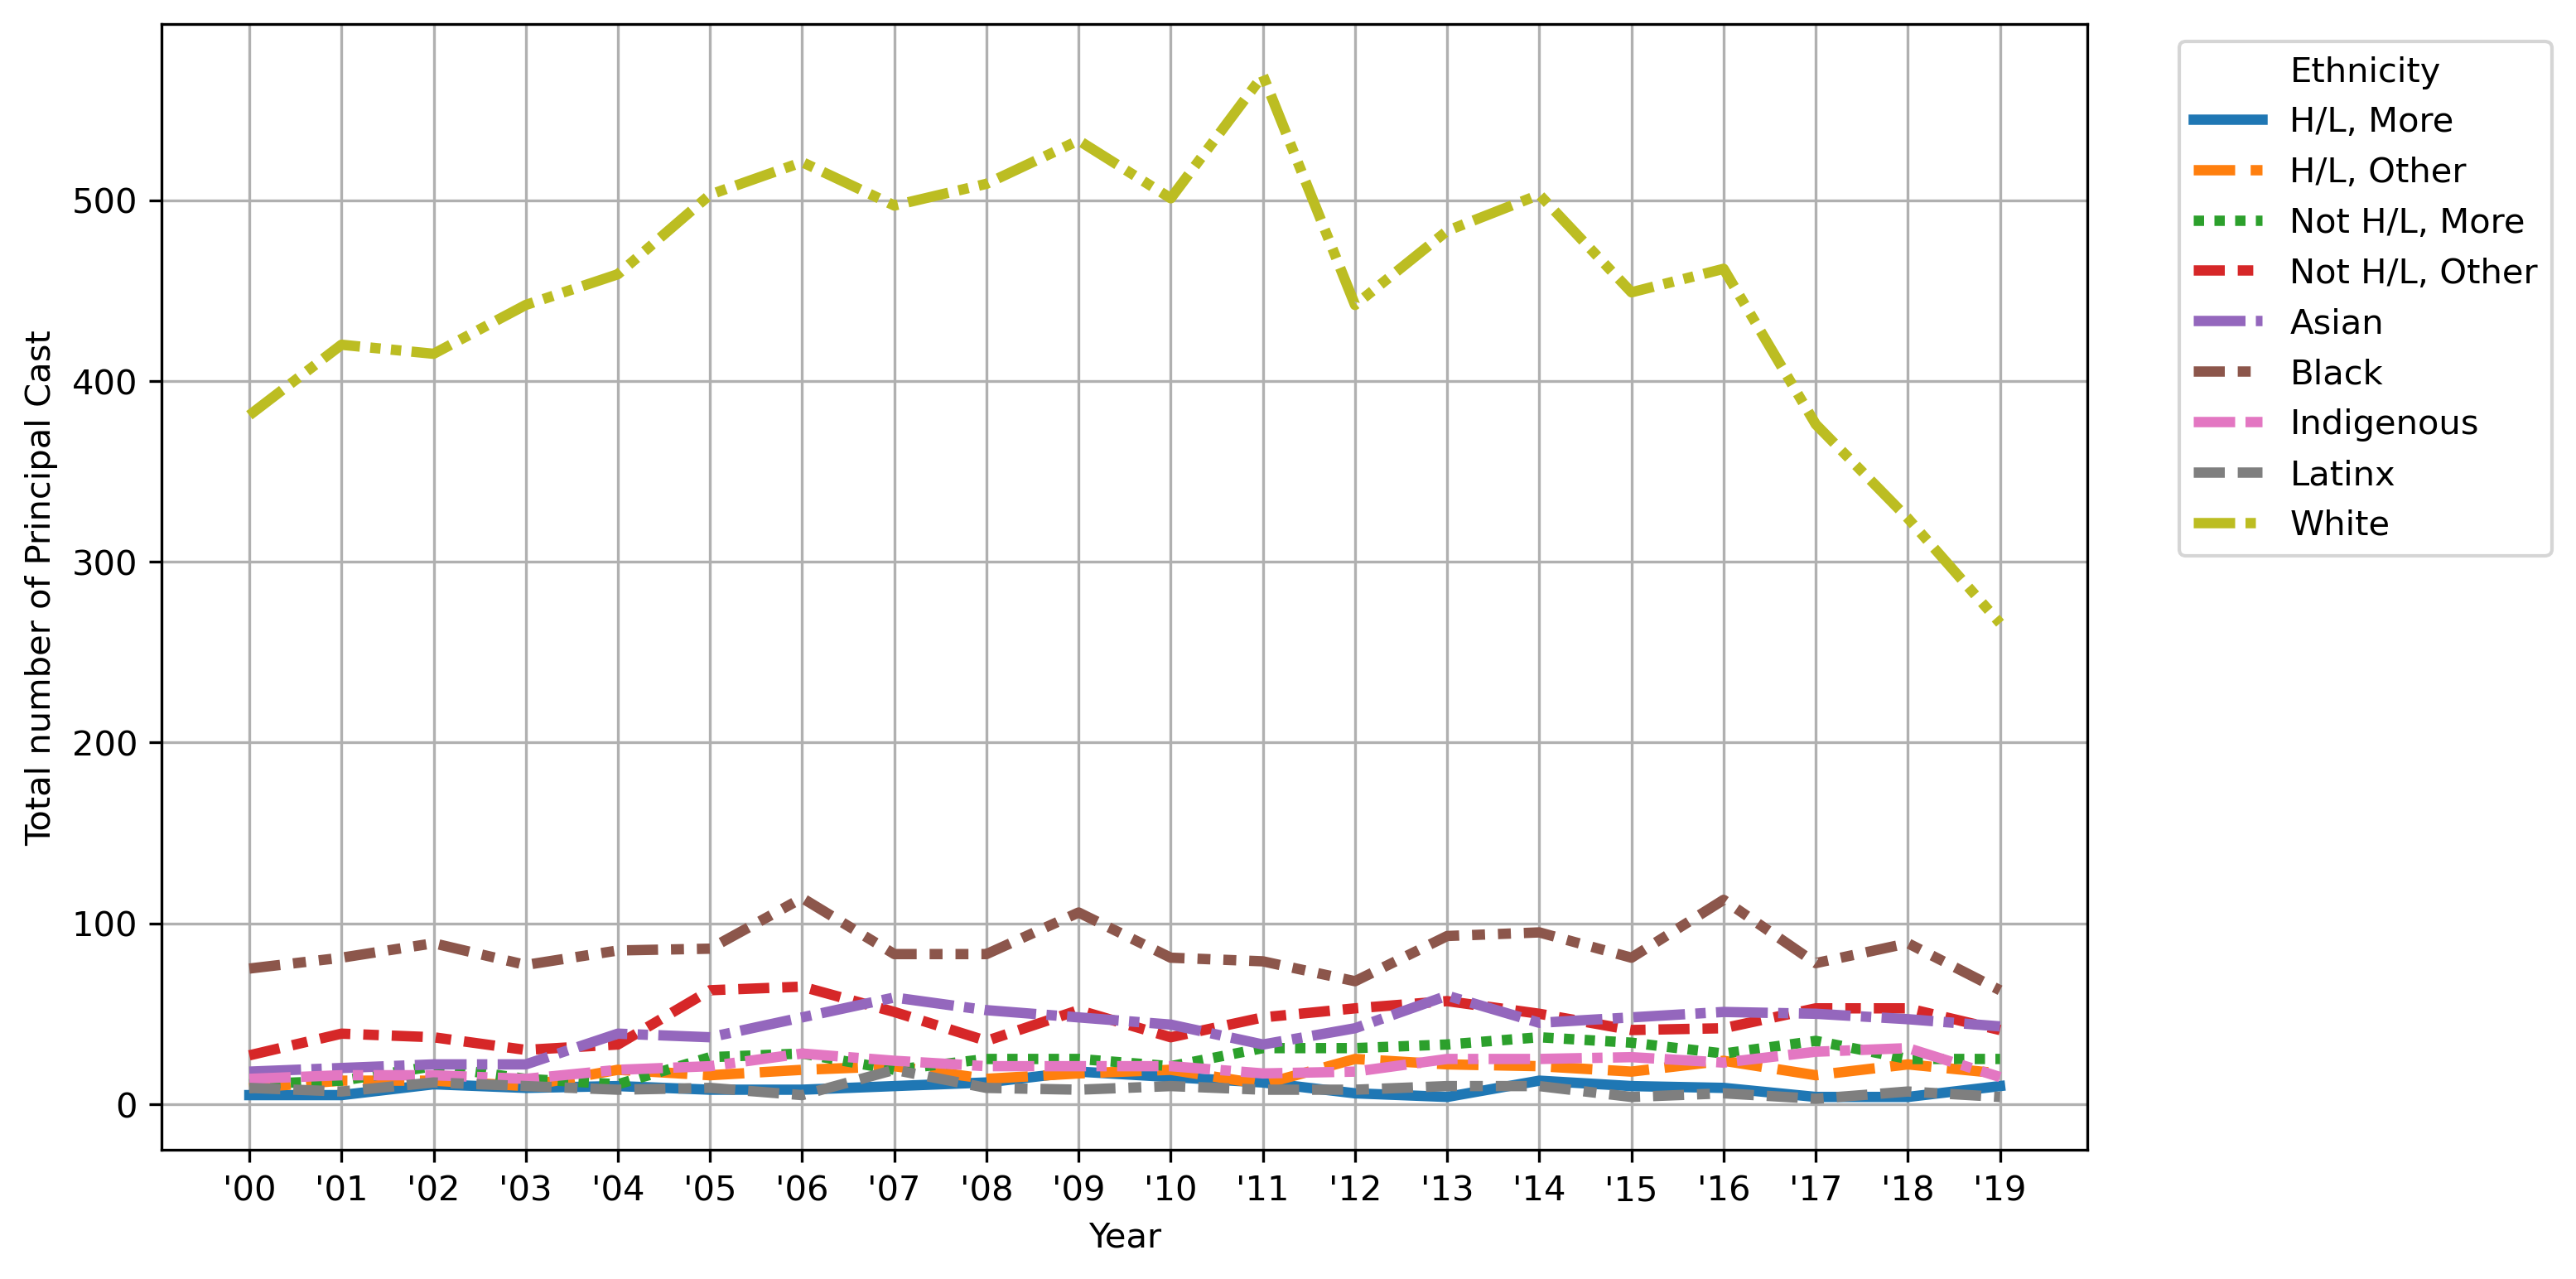

In [26]:
# Create the Seaborn plot
plt.figure(dpi=300)

sns.reset_defaults()
# sns.set(rc={ 'axes.facecolor':'white' ,"grid.color": "grey", "grid.linestyle": ":"})
# sns.set_context("talk")
# marker_options = [".", ",", "o", "v", "^", "<", ">", "1", "2"]

ax = sns.lineplot(data=grouped_df, x="startYear", y="tconst", hue="NEW_ACTOR_RACE",legend='brief',style="NEW_ACTOR_RACE",linewidth=3 )
ax.legend(bbox_to_anchor=(1.25, 1),loc='upper right', title='Ethnicity', labels=["H/L, More", "H/L, Other", "Not H/L, More","Not H/L, Other","Asian","Black","Indigenous","Latinx","White"], prop={'size': 10})

# Change the x-axis label
ax.set_xlabel('Year' )

# Change the y-axis label
ax.set_ylabel('Total number of Principal Cast' )

years = range(df.unstack().index.min(), df.unstack().index.max() + 1)
ax.set_xticks(years)
ax.set_xticklabels(year_labels)

# ax.figure.set_facecolor("white")

# Adjust the size of the figure
ax.figure.set_size_inches(10, 6)
# plt.xticks(rotation=45)
plt.grid()
# plt.setp(ax.patches, linewidth=1)
plt.show()


In [27]:
unstacked_df = grouped_df.unstack()
unstacked_df.reset_index(level=[0]).to_csv("testing.csv")

In [28]:
unstacked_df.columns

MultiIndex([('tconst', 'HL+M'),
            ('tconst', 'HL+O'),
            ('tconst', 'NL+M'),
            ('tconst', 'NL+O'),
            ('tconst',    'a'),
            ('tconst',    'b'),
            ('tconst',    'i'),
            ('tconst',    'l'),
            ('tconst',    'w')],
           names=[None, 'NEW_ACTOR_RACE'])

In [29]:
grouped_df 

tconst
startYear NEW_ACTOR_RACE        
2000      HL+M                 5
          HL+O                 9
          NL+M                11
          NL+O                27
          a                   18
...                          ...
2019      a                   43
          b                   63
          i                   15
          l                    4
          w                  266

[180 rows x 1 columns]

In [31]:
# calculate chi-squared statistic and p-value for genres
# chi2, p_value = stats.chisquare(cast_df.genres, dummy_df.genres)
# print(f'Chi-squared statistic for genres: {chi2}')
# print(f'p-value for genres: {p_value}')

In [43]:
# # calculate chi-squared statistic and p-value for ratings
# chi2, p_value = stats.chisquare(rating_pop1, rating_pop2)
# print(f'Chi-squared statistic for ratings: {chi2}')
# print(f'p-value for ratings: {p_value}')

# # calculate chi-squared statistic and p-value for budgets
# chi2, p_value = stats.chisquare(budget_pop1, budget_pop2)
# print(f'Chi-squared statistic for budgets: {chi2}')
# print(f'p-value for budgets: {p_value}')

# # calculate chi-squared statistic and p-value for revenues
# chi2, p_value = stats.chisquare(revenue_pop1, revenue_pop2)
# print(f'Chi-squared statistic for revenues: {chi2}')
# print(f'p-value for revenues: {p_value}')


In [44]:
test = pd.read_csv("testing.csv")
test

,Unnamed: 0,startYear,tconst,tconst.1,tconst.2,tconst.3,tconst.4,tconst.5,tconst.6,tconst.7,tconst.8
0,NEW_ACTOR_RACE,NaN,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w
1,0,2000.0,5,9,11,27,18,75,14,9,381
2,1,2001.0,5,13,13,39,20,81,16,7,420
3,2,2002.0,11,13,21,37,22,89,16,12,415
4,3,2003.0,9,10,14,30,22,77,14,10,442
5,4,2004.0,10,19,11,33,39,85,19,8,459
6,5,2005.0,8,16,26,63,37,86,21,9,503
7,6,2006.0,8,19,28,65,48,114,28,5,521
8,7,2007.0,10,21,19,51,59,83,24,19,497
9,8,2008.0,12,14,25,35,52,83,21,9,509


In [34]:
test = test.reset_index(drop=True)

In [35]:
test = test.drop("NEW_ACTOR_RACE", axis=1)

KeyError: "['NEW_ACTOR_RACE'] not found in axis"

In [36]:
test["total"] = test.sum()

In [37]:
test["total"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
Name: total, dtype: object

In [38]:
testing_prop = pd.read_csv("testing_prop.csv")
testing_prop.head()

,NEW_ACTOR_RACE,startYear,HL+M,HL+O,NL+M,NL+O,a,b,i,l,...,Total,Proportion NL+M,Proportion HL+O,Proportion NL+M.1,Proportion NL+O,Proportion a,Proportion b,Proportion i,Proportion l,Proportion w
0,0,2000,5,9,11,27,18,75,14,9,...,549,0.009107,0.016393,0.020036,0.049180,0.032787,0.136612,0.025501,0.016393,0.693989
1,1,2001,5,13,13,39,20,81,16,7,...,614,0.008143,0.021173,0.021173,0.063518,0.032573,0.131922,0.026059,0.011401,0.684039
2,2,2002,11,13,21,37,22,89,16,12,...,636,0.017296,0.020440,0.033019,0.058176,0.034591,0.139937,0.025157,0.018868,0.652516
3,3,2003,9,10,14,30,22,77,14,10,...,628,0.014331,0.015924,0.022293,0.047771,0.035032,0.122611,0.022293,0.015924,0.703822
4,4,2004,10,19,11,33,39,85,19,8,...,683,0.014641,0.027818,0.016105,0.048316,0.057101,0.124451,0.027818,0.011713,0.672035


In [39]:
# ax = sns.lineplot(data=grouped_df, x="startYear", y="Proportion w" ,legend='brief', linewidth=3 )


In [40]:
testing_prop["Proportion w"]

0     0.693989
1     0.684039
2     0.652516
3     0.703822
4     0.672035
5     0.654096
6     0.623206
7     0.634738
8     0.669737
9     0.643720
10    0.668892
11    0.704208
12    0.637807
13    0.613723
14    0.629537
15    0.631505
16    0.609499
17    0.583851
18    0.538206
19    0.549587
Name: Proportion w, dtype: float64

Proportion NL+M
Proportion HL+O
Proportion NL+M.1
Proportion  NL+O
Proportion  a
Proportion  b
Proportion i
Proportion l
Proportion w


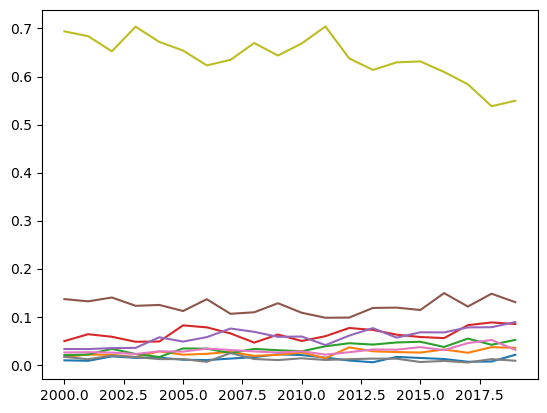

In [41]:
# for col in range(y.shape[1]):
#     plot(x, y[:, col])
for i in testing_prop.columns[12:]:
    print(i)
    plt.plot(testing_prop["startYear"], testing_prop[i])
# plt.plot(testing_prop["startYear"], testing_prop["Proportion NL+M"])
# plt.plot(testing_prop["startYear"], testing_prop["Proportion  L+M"])
# plt.plot(testing_prop["startYear"], testing_prop["Proportion  a"])

# plt.plot(testing_prop["startYear"], testing_prop["Proportion  a"])

# plt.plot(testing_prop["startYear"], testing_prop["Proportion  a"])

plt.show()

In [42]:
testing_prop

,NEW_ACTOR_RACE,startYear,HL+M,HL+O,NL+M,NL+O,a,b,i,l,...,Total,Proportion NL+M,Proportion HL+O,Proportion NL+M.1,Proportion NL+O,Proportion a,Proportion b,Proportion i,Proportion l,Proportion w
0,0,2000,5,9,11,27,18,75,14,9,...,549,0.009107,0.016393,0.020036,0.049180,0.032787,0.136612,0.025501,0.016393,0.693989
1,1,2001,5,13,13,39,20,81,16,7,...,614,0.008143,0.021173,0.021173,0.063518,0.032573,0.131922,0.026059,0.011401,0.684039
2,2,2002,11,13,21,37,22,89,16,12,...,636,0.017296,0.020440,0.033019,0.058176,0.034591,0.139937,0.025157,0.018868,0.652516
3,3,2003,9,10,14,30,22,77,14,10,...,628,0.014331,0.015924,0.022293,0.047771,0.035032,0.122611,0.022293,0.015924,0.703822
4,4,2004,10,19,11,33,39,85,19,8,...,683,0.014641,0.027818,0.016105,0.048316,0.057101,0.124451,0.027818,0.011713,0.672035
5,5,2005,8,16,26,63,37,86,21,9,...,769,0.010403,0.020806,0.033810,0.081925,0.048114,0.111834,0.027308,0.011704,0.654096
6,6,2006,8,19,28,65,48,114,28,5,...,836,0.009569,0.022727,0.033493,0.077751,0.057416,0.136364,0.033493,0.005981,0.623206
7,7,2007,10,21,19,51,59,83,24,19,...,783,0.012771,0.026820,0.024266,0.065134,0.075351,0.106003,0.030651,0.024266,0.634738
8,8,2008,12,14,25,35,52,83,21,9,...,760,0.015789,0.018421,0.032895,0.046053,0.068421,0.109211,0.027632,0.011842,0.669737
9,9,2009,18,17,25,52,48,106,21,8,...,828,0.021739,0.020531,0.030193,0.062802,0.057971,0.128019,0.025362,0.009662,0.643720
